In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving my_movies.csv to my_movies.csv


In [3]:
movies_data = pd.read_csv("my_movies.csv")
movies_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
movies_data.shape

(10, 15)

In [6]:
movies_data.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
movies_data.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [8]:
movies_data = movies_data.iloc[:,5:]
movies_data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [9]:
movies_data.shape

(10, 10)

In [10]:
movies_data.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [11]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [12]:
count = movies_data.loc[:,:].sum()
count

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

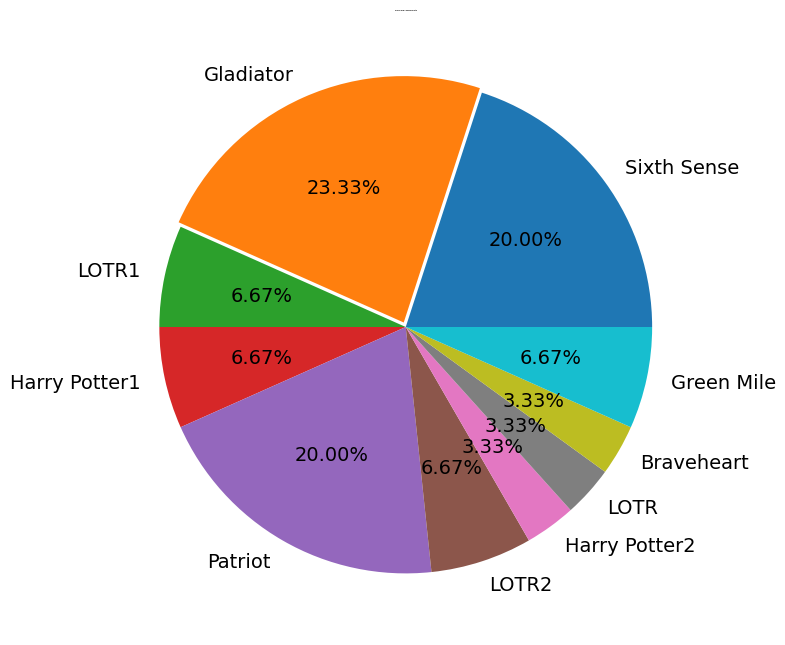

In [14]:
#EDA

plt.figure(figsize=(8,8))
plt.pie(movies_data.sum(),labels = movies_data.columns,
        explode = [0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct='%.2f%%',textprops={'size':14})

plt.title("Movies W.R.T Purchase Rate",fontsize=-18, fontweight='bold')
plt.show()

In [15]:
#Top Popular Cinemas
count.sort_values(0,ascending=False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns={'index':'items',0:'count'})
count

,items,count
0,Gladiator,7
1,Sixth Sense,6
2,Patriot,6
3,LOTR1,2
4,Harry Potter1,2
5,LOTR2,2
6,Green Mile,2
7,Harry Potter2,1
8,LOTR,1
9,Braveheart,1


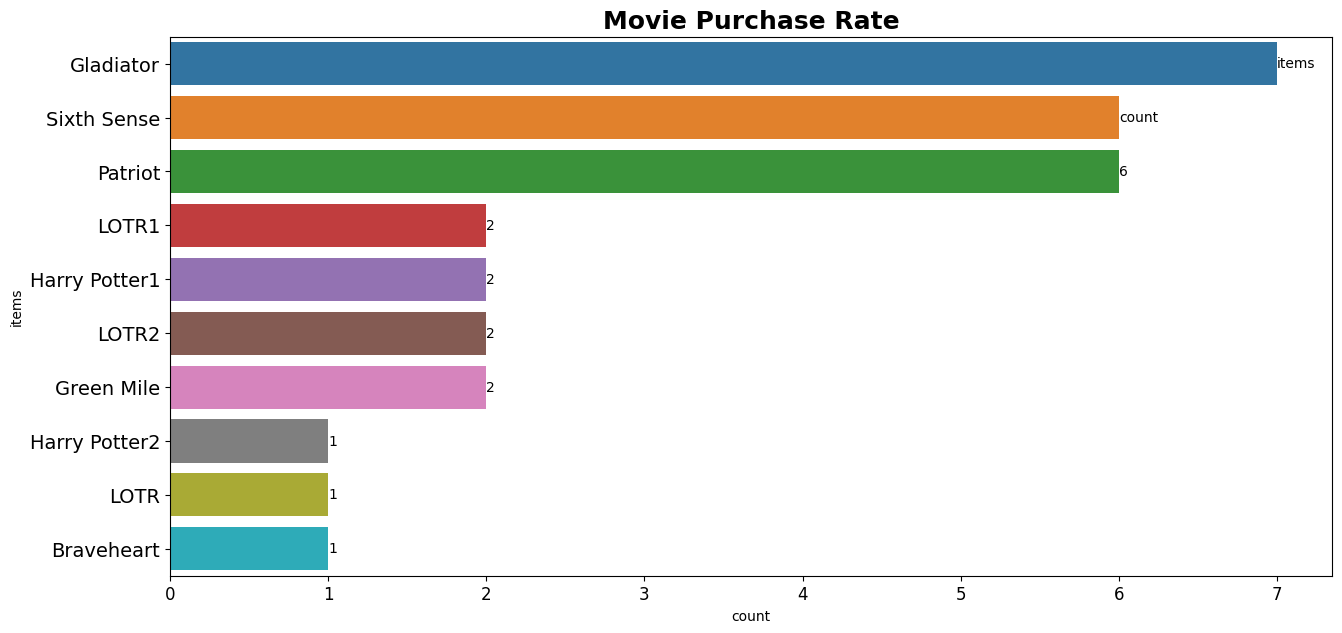

In [18]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x='count', y='items',data=count)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.title('Movie Purchase Rate',fontsize=18, fontweight="bold")
for i in ax.containers:
    ax.bar_label(i,_)

Most Viewed Movie as per Data is Gladiator and Sixth-Sense


In [19]:
#product Frequency
first = pd.DataFrame(movies_data.sum() / movies_data.shape[0], columns=['Support']).sort_values("Support",ascending=False)
first

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [21]:
#Elimination Of Support Value
first[first.Support>=0.1]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [22]:
first[first.Support>=0.15]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [23]:
first[first.Support>=0.20]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [24]:
#Second Iteration
#Finding Pair Values for Pair Product Combination

second = list(itertools.combinations(first.index , 2))
second = [list(i) for i in second]

second[:10]

[['Gladiator', 'Sixth Sense'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'LOTR1'],
 ['Gladiator', 'Harry Potter1'],
 ['Gladiator', 'LOTR2'],
 ['Gladiator', 'Green Mile'],
 ['Gladiator', 'Harry Potter2'],
 ['Gladiator', 'LOTR'],
 ['Gladiator', 'Braveheart'],
 ['Sixth Sense', 'Patriot']]

In [26]:
value = []
for i in range(0, len(second)):
    temp = movies_data.T.loc[second[i]].sum() 
    temp = len(temp[temp == movies_data.T.loc[second[i]].shape[0]]) / movies_data.shape[0]
    value.append(temp)

# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)

# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2
"(Sixth Sense, Green Mile)",0.2,2
"(LOTR1, LOTR2)",0.2,2


In [27]:
second = list(itertools.combinations(first.index, 3))
second = [list(i) for i in second]

second[:10]

[['Gladiator', 'Sixth Sense', 'Patriot'],
 ['Gladiator', 'Sixth Sense', 'LOTR1'],
 ['Gladiator', 'Sixth Sense', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'Green Mile'],
 ['Gladiator', 'Sixth Sense', 'Harry Potter2'],
 ['Gladiator', 'Sixth Sense', 'LOTR'],
 ['Gladiator', 'Sixth Sense', 'Braveheart'],
 ['Gladiator', 'Patriot', 'LOTR1'],
 ['Gladiator', 'Patriot', 'Harry Potter1']]

In [29]:
value = []
for i in range(0, len(second)):
    temp = movies_data.T.loc[second[i]].sum() 
    temp = len(temp[temp == movies_data.T.loc[second[i]].shape[0]]) / movies_data.shape[0]
    value.append(temp)

# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,
"(Gladiator, Sixth Sense, Patriot)",0.4,3


In [30]:
second = list(itertools.combinations(first.index, 4))
second = [list(i) for i in second]

second[:10]

[['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR1'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Green Mile'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Harry Potter2'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'LOTR'],
 ['Gladiator', 'Sixth Sense', 'Patriot', 'Braveheart'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'Harry Potter1'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'LOTR2'],
 ['Gladiator', 'Sixth Sense', 'LOTR1', 'Green Mile']]

In [31]:
value = []
for i in range(0, len(second)):
    temp = movies_data.T.loc[second[i]].sum() 
    temp = len(temp[temp == movies_data.T.loc[second[i]].shape[0]]) / movies_data.shape[0]
    value.append(temp)
    
# Create a data frame            
secondIteration = pd.DataFrame(value, columns = ["Support"])
secondIteration["index"] = [tuple(i) for i in second]
secondIteration['length'] = secondIteration['index'].apply(lambda x:len(x))
secondIteration = secondIteration.set_index("index").sort_values("Support", ascending = False)
# Elimination by Support Value
secondIteration = secondIteration[secondIteration.Support > 0.1]
secondIteration

,Support,length
index,,


## **Association Rules**

In [33]:
#10% Support
frequent_itemsets1 = apriori(movies_data,min_support=0.1,use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


**Support value gives us these information:**

### ***Head 5 ***

60 % 100 purchases are Sixth Sense

70 % 100 purchases are Gladiator

20 % 100 purchases are LOTR1

20 % 100 purchases are Harry Potter

60 % 100 purchases are Patriot

## ***Tail 5***

10 % 100 purchases are Green Mile, LOTR1, Harry Potter1, Sixth Sense

10 % 100 purchases are Green Mile, LOTR2, LOTR1, Sixth Sense

10 % 100 purchases are Green Mile, LOTR2, Harry Potter1, Sixth Sense

10 % 100 purchases are Green Mile, LOTR2, LOTR1, Harry Potter1

10 % 100 purchases are Sixth Sense, LOTR2, Harry Potter1, Green Mile, LOTR1

In [34]:
#with 30% Confidence

rules1 = association_rules(frequent_itemsets1, metric='confidence', min_threshold=0.3)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
212,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,(Harry Potter1),"(Sixth Sense, LOTR1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(LOTR1),"(Sixth Sense, Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
215,(Green Mile),"(Sixth Sense, Harry Potter1, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [35]:
rules1.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
183,"(Green Mile, LOTR2)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
180,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
168,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
116,"(Sixth Sense, LOTR)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
117,"(Gladiator, Green Mile)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
6,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8
14,(Green Mile),(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6


In [36]:
lift1 = rules1[rules1.lift>1]
lift1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
212,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
213,(Harry Potter1),"(Sixth Sense, LOTR1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(LOTR1),"(Sixth Sense, Harry Potter1, Green Mile, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
215,(Green Mile),"(Sixth Sense, Harry Potter1, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


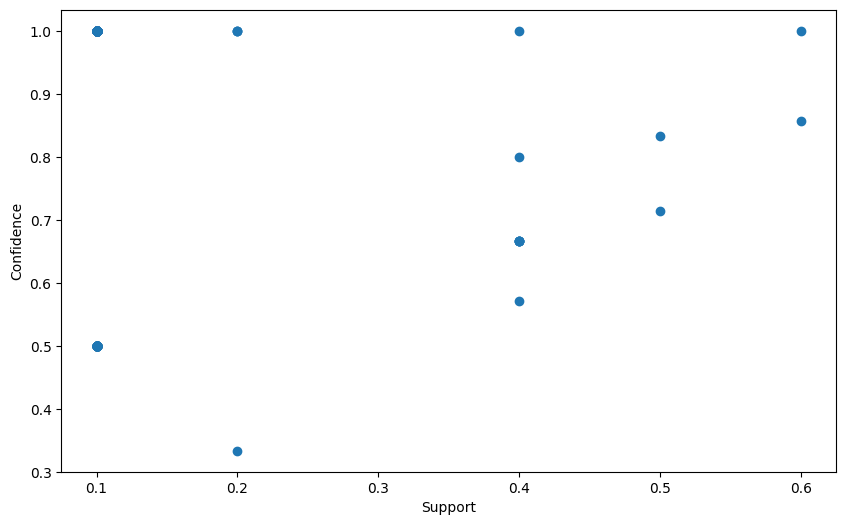

In [37]:
#Visualisation Of Obtained Rule
plt.figure(figsize=(10,6))
plt.scatter(rules1['support'],rules1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence') 
plt.show()

In [38]:
matrix1 = lift1.pivot('antecedents','consequents','lift')
matrix1

consequents,(Gladiator),"(LOTR1, Green Mile)","(Harry Potter1, Green Mile)","(Green Mile, LOTR2)","(Sixth Sense, Gladiator, LOTR)","(Sixth Sense, Gladiator, Green Mile)","(Sixth Sense, LOTR1, LOTR2)","(Sixth Sense, Harry Potter1, LOTR1)","(Sixth Sense, LOTR1, Green Mile)","(Sixth Sense, Harry Potter1, Green Mile)",...,"(Sixth Sense, Gladiator)","(Sixth Sense, Patriot)","(Sixth Sense, LOTR1)","(Sixth Sense, Harry Potter1)","(Sixth Sense, LOTR2)","(Sixth Sense, Green Mile)","(Sixth Sense, LOTR)","(Sixth Sense, Harry Potter1, LOTR1, LOTR2)","(Gladiator, Green Mile)","(Sixth Sense, Harry Potter1, LOTR1, Green Mile)"
antecedents,,,,,,,,,,,,,,,,,,,,,
(Sixth Sense),1.190476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Green Mile, LOTR2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
"(Green Mile, LOTR)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Braveheart)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Patriot, Braveheart)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(LOTR1, LOTR2)",NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,5.0,NaN,2.5,NaN,NaN,NaN,NaN
(Harry Potter1),NaN,5.0,NaN,5.0,NaN,NaN,5.0,NaN,5.0,NaN,...,NaN,NaN,5.0,NaN,5.0,2.5,NaN,NaN,NaN,NaN
"(Sixth Sense, Gladiator, Green Mile)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Gladiator, LOTR)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


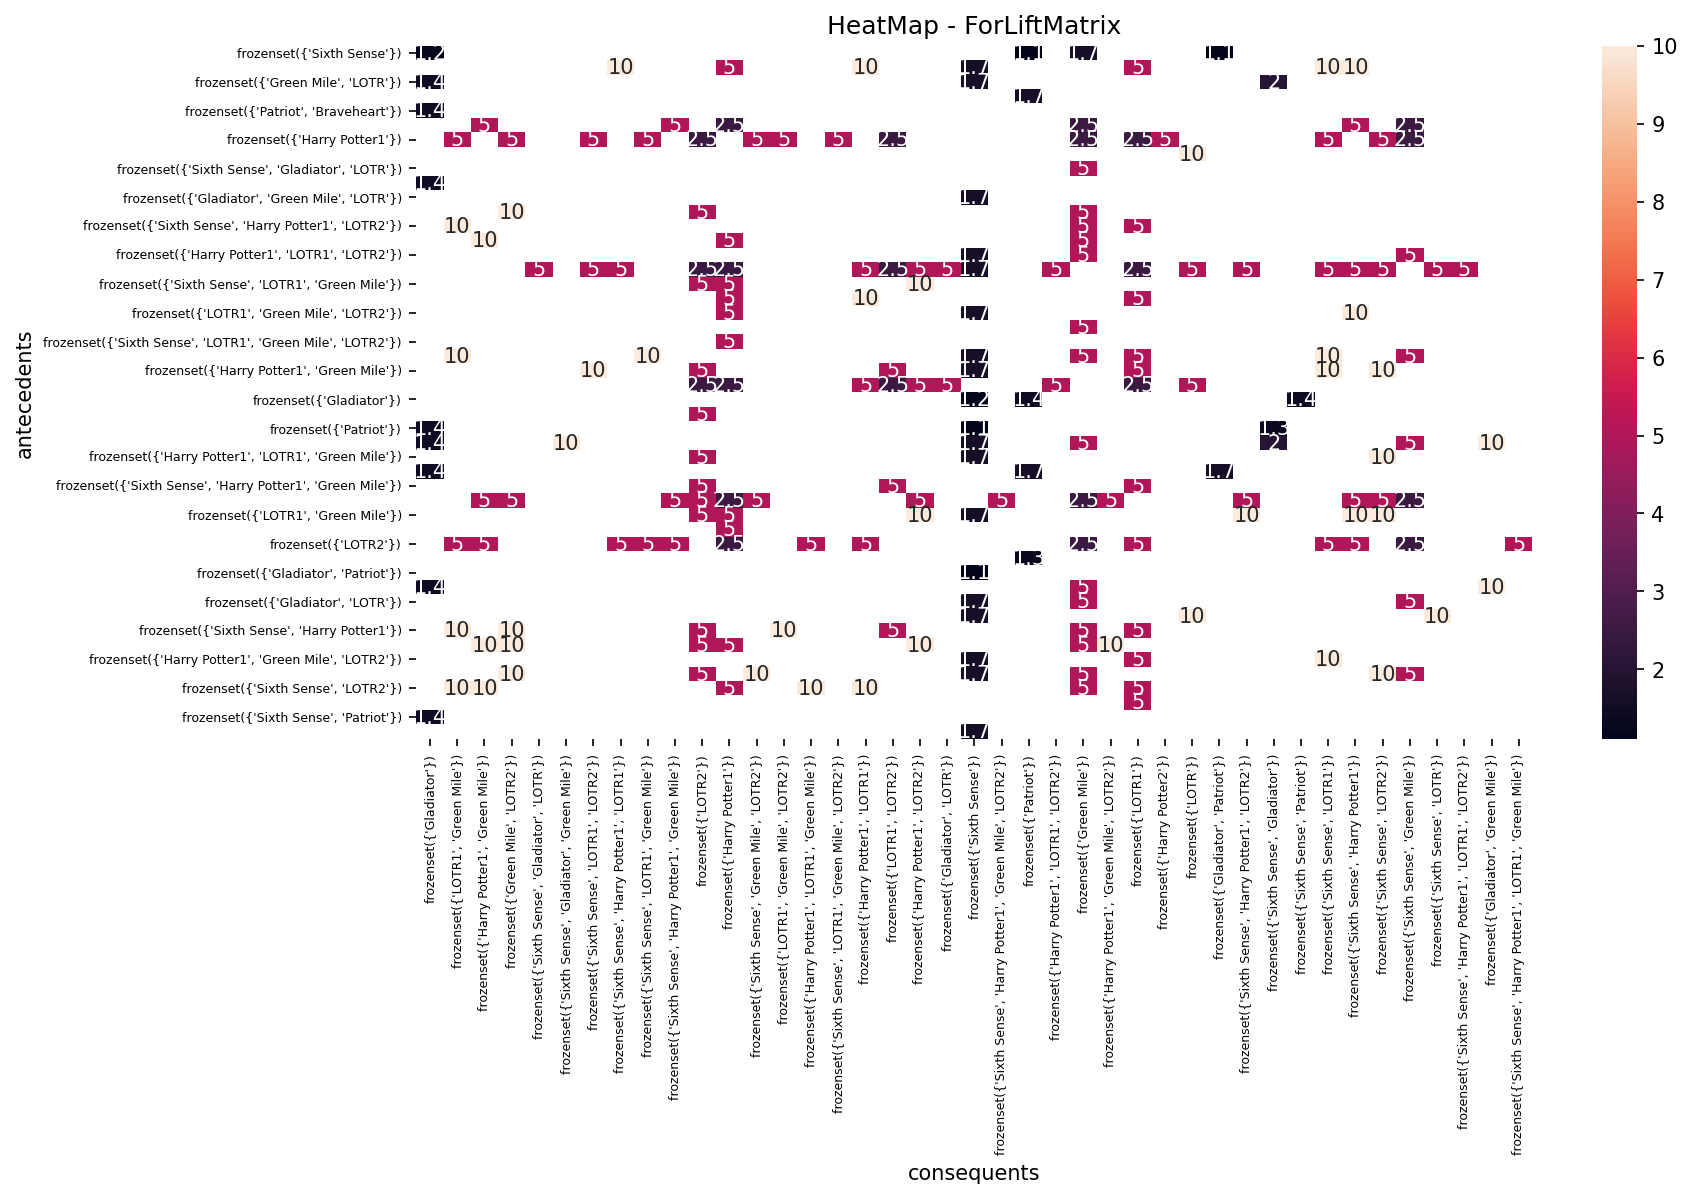

In [39]:
plt.figure(figsize=(12,6),dpi=150)
sns.heatmap(matrix1, annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0, fontsize= 6)
plt.xticks(rotation=90, fontsize= 6)
plt.show()

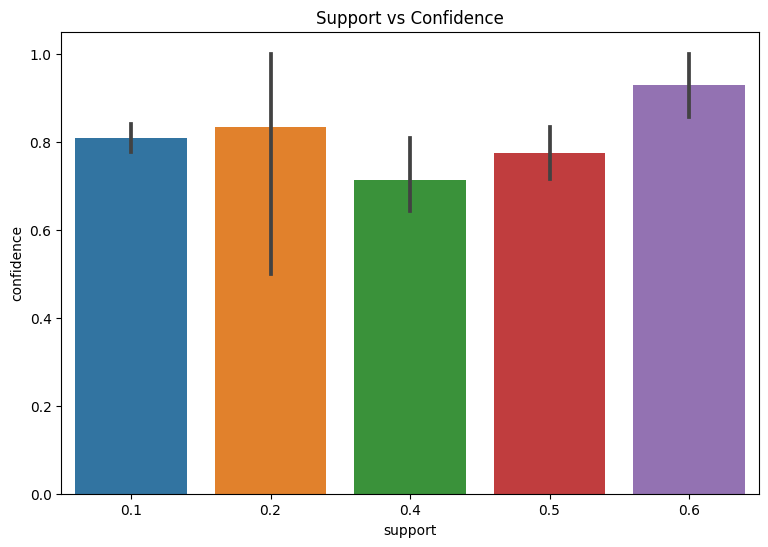

In [40]:
plt.figure(figsize=(9,6))
sns.barplot(data=lift1,x="support",y="confidence")
plt.title("Support vs Confidence")
plt.show()

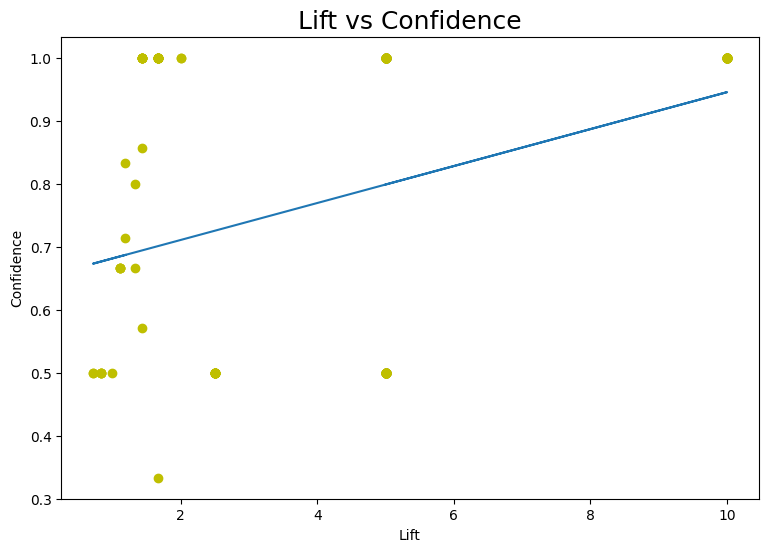

In [41]:
plt.figure(figsize=(9,6))
fit = np.polyfit(rules1['lift'], rules1['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules1['lift'], rules1['confidence'], 'yo', rules1['lift'], 
fit_fn(rules1['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence', fontsize= 18)
plt.show()

In [43]:
#with 15%Support
frequent_itemsets2 = apriori(movies_data,min_support=0.15,use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


## **Head 5**

42 % purchases are Sixth Sense

24 % purchases are Gladiator

43 % purchases are LOTR1

28 % purchases are Harry Potter1

21 % purchases are Patrio

In [44]:
rules2 = association_rules(frequent_itemsets2, metric='confidence', min_threshold=0.4)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [45]:
rules2.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
14,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
10,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
13,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8


In [46]:
lift2 = rules2[rules2.lift>1]
lift2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


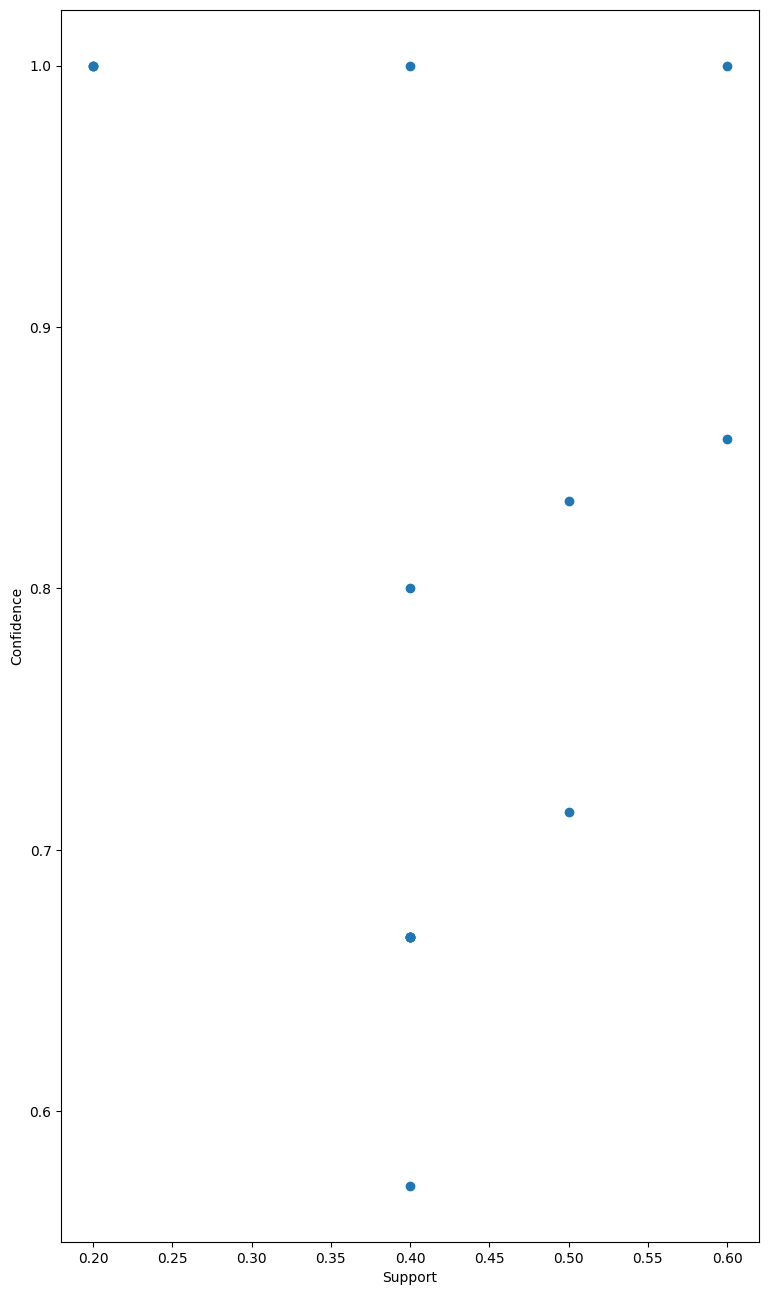

In [47]:
#Visualisation Of Obtained Rule
plt.figure(figsize=(9,16))
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

In [48]:
matrix2 = lift2.pivot('antecedents','consequents','lift')
matrix2

consequents,(Gladiator),(Sixth Sense),(Patriot),(LOTR2),(LOTR1),"(Gladiator, Patriot)","(Sixth Sense, Gladiator)","(Sixth Sense, Patriot)"
antecedents,,,,,,,,
(Sixth Sense),1.190476,NaN,1.111111,NaN,NaN,1.111111,NaN,NaN
(Gladiator),NaN,1.190476,1.428571,NaN,NaN,NaN,NaN,1.428571
(Patriot),1.428571,1.111111,NaN,NaN,NaN,NaN,1.333333,NaN
(Green Mile),NaN,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
"(Sixth Sense, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Gladiator)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN,NaN
"(Gladiator, Patriot)",NaN,1.111111,NaN,NaN,NaN,NaN,NaN,NaN


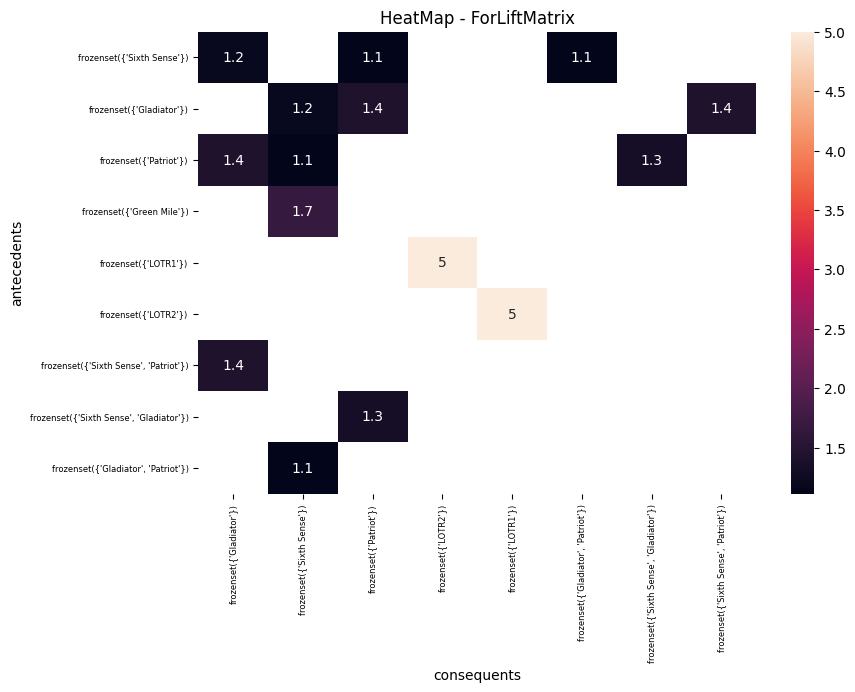

In [49]:
plt.figure(figsize=(9,6),dpi=100)
sns.heatmap(matrix2,annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0, fontsize= 6)
plt.xticks(rotation=90, fontsize= 6)
plt.show()

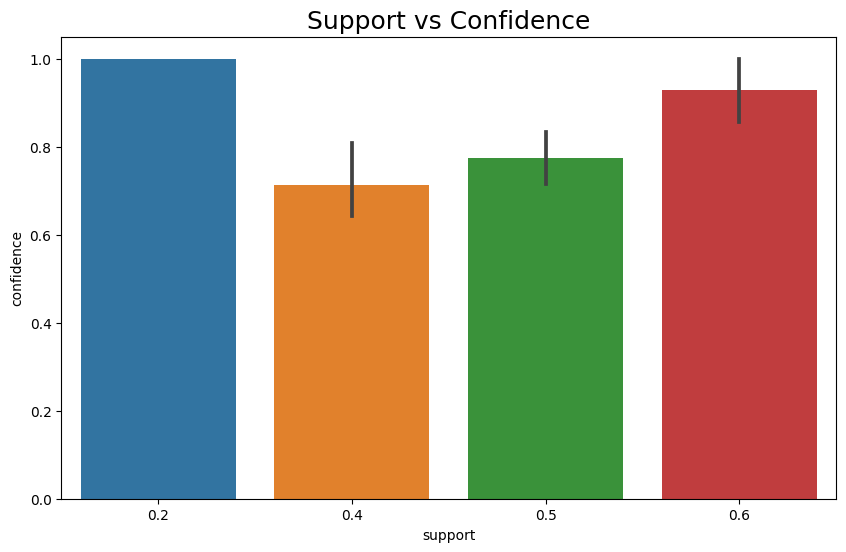

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(data=lift2,x="support",y="confidence")
plt.title("Support vs Confidence", fontsize= 18)
plt.show()

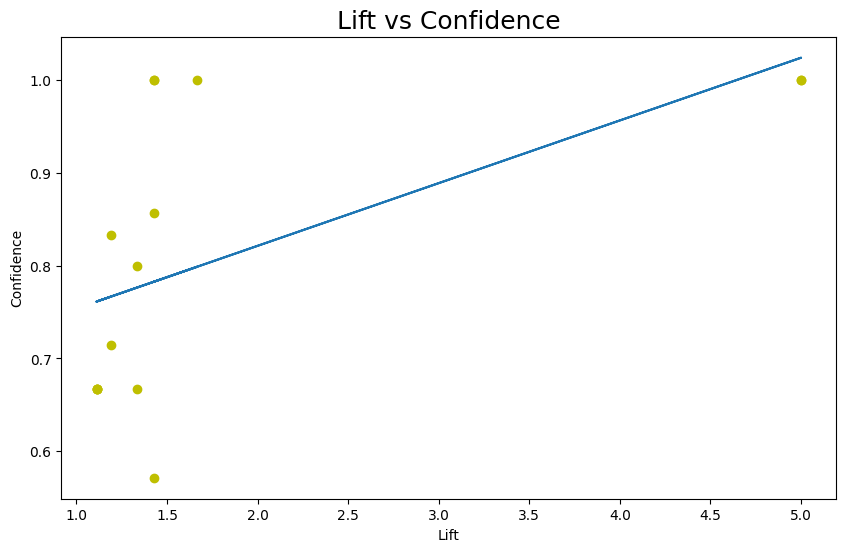

In [51]:
plt.figure(figsize=(10,6))
fit = np.polyfit(rules2['lift'], rules2['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules2['lift'], rules2['confidence'], 'yo', rules2['lift'], 
fit_fn(rules2['lift']))
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence', fontsize= 18)
plt.show()

In [52]:
#With 20% Support
frequent_itemsets3 = apriori(movies_data, min_support=0.2,use_colnames=True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


42 % purchases are Sixth Sense

24 % purchases are Gladiator

43 % purchases are LOTR1

28 % purchases are Harry Potter1

21 % purchases are Patriot

In [53]:
#60% Confidence
rules3 = association_rules(frequent_itemsets3, metric='confidence', min_threshold=0.6)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


In [54]:
rules3.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
10,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
13,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


In [55]:
lift3 = rules3[rules3.lift>1]
lift3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


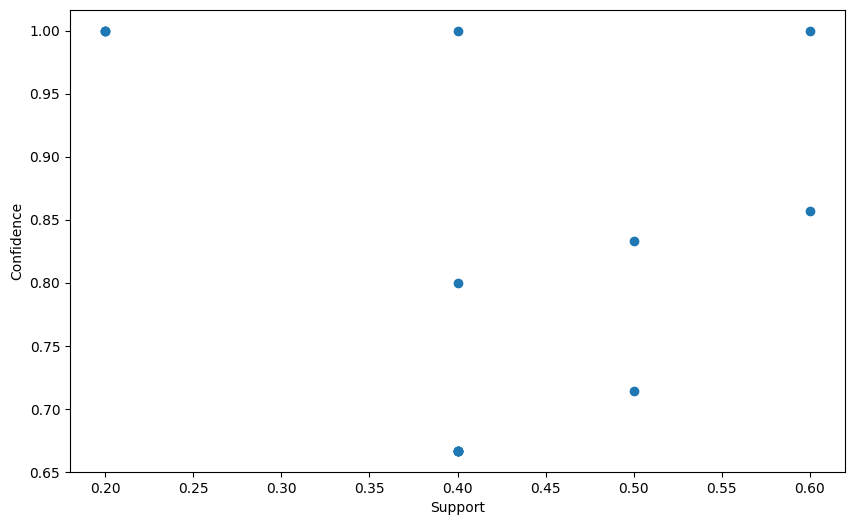

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence') 
plt.show()

In [57]:
matrix3 = lift3.pivot('antecedents','consequents','lift')
matrix3

consequents,(Gladiator),(Sixth Sense),(Patriot),(LOTR2),(LOTR1),"(Gladiator, Patriot)","(Sixth Sense, Gladiator)"
antecedents,,,,,,,
(Sixth Sense),1.190476,NaN,1.111111,NaN,NaN,1.111111,NaN
(Gladiator),NaN,1.190476,1.428571,NaN,NaN,NaN,NaN
(Patriot),1.428571,1.111111,NaN,NaN,NaN,NaN,1.333333
(Green Mile),NaN,1.666667,NaN,NaN,NaN,NaN,NaN
(LOTR1),NaN,NaN,NaN,5.0,NaN,NaN,NaN
(LOTR2),NaN,NaN,NaN,NaN,5.0,NaN,NaN
"(Sixth Sense, Patriot)",1.428571,NaN,NaN,NaN,NaN,NaN,NaN
"(Sixth Sense, Gladiator)",NaN,NaN,1.333333,NaN,NaN,NaN,NaN
"(Gladiator, Patriot)",NaN,1.111111,NaN,NaN,NaN,NaN,NaN


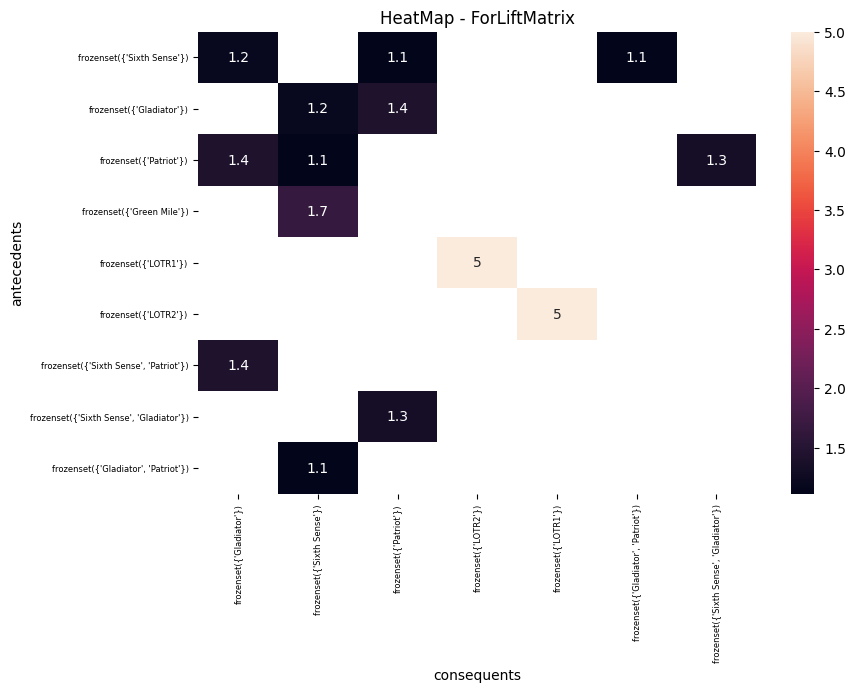

In [58]:
plt.figure(figsize=(9,6),dpi=100)
sns.heatmap(matrix3, annot=True)
plt.title('HeatMap - ForLiftMatrix')
plt.yticks(rotation=0, fontsize= 6)
plt.xticks(rotation=90, fontsize= 6)
plt.show()

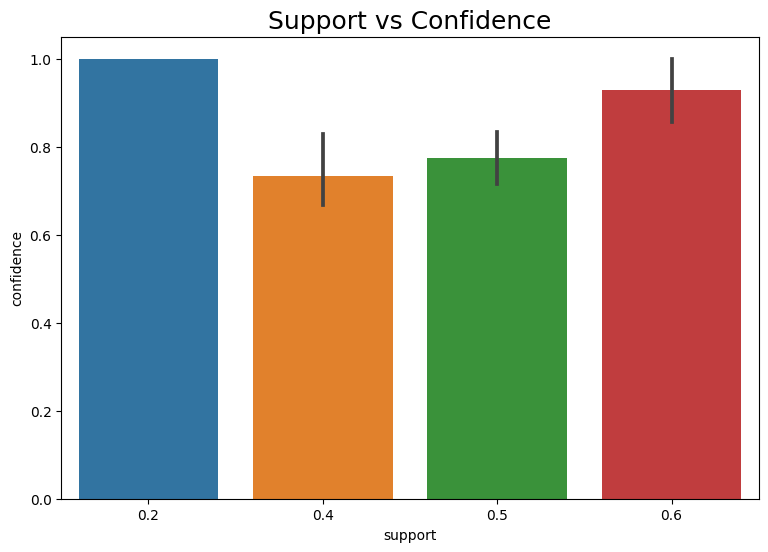

In [59]:
plt.figure(figsize=(9,6))
sns.barplot(data=lift3,x="support",y="confidence")
plt.title("Support vs Confidence", fontsize= 18)
plt.show()